In [1]:
# importing the libaray
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import the train dataset
df_train=pd.read_excel('Data_Train.xlsx')

In [3]:
# import the test dataset
df_test=pd.read_excel('Data_Test.xlsx')

# joinig both the file so that operations can be performs on both the files simultaneosuly

In [4]:
data=pd.concat([df_train,df_test],sort=False)
data.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [5]:
data.Average_Cost.unique()

array(['₹200', '₹100', '₹150', '₹250', '₹650', '₹350', '₹800', '₹50',
       '₹400', '₹600', '₹300', '₹750', '₹450', '₹550', '₹1,000', '₹500',
       '₹900', '₹1,200', '₹950', '₹850', '₹700', '₹1,150', 'for',
       '₹1,100', '₹1,400', '₹2,050'], dtype=object)

# To eliminate RS sign

In [6]:
data["Average_Cost"]=data["Average_Cost"].str.replace("₹","")

In [7]:
data["Minimum_Order"]=data["Minimum_Order"].str.replace("₹","")

In [8]:
data["Delivery_Time"]=data["Delivery_Time"].str.replace("minutes","")

# Extracting city from address

In [9]:
data['City.Pune'] = data['Location'].apply(lambda x: 'Pune' if 'Pune' in x else None)
data['City.Kolkata'] = data['Location'].apply(lambda x: 'Kolkata' if 'Kolkata' in x else None)
data['City.Mumbai'] = data['Location'].apply(lambda x: 'Mumbai' if 'Mumbai' in x else None)
data['City.Bangalore'] = data['Location'].apply(lambda x: 'Bangalore' if 'Bangalore' in x else None)
data['City.Delhi'] = data['Location'].apply(lambda x: 'Delhi' if 'Delhi' in x else None)
data['City.Hyderabad'] = data['Location'].apply(lambda x: 'Hyderabad' if 'Hyderabad' in x else None)
data['City.Noida'] = data['Location'].apply(lambda x: 'Noida' if 'Noida' in x else None)
data['City.Gurgaon'] = data['Location'].apply(lambda x: 'Gurgaon' if 'Gurgaon' in x else None)
data['City.Majestic'] = data['Location'].apply(lambda x: 'Bangalore' if 'Majestic' in x else None)
data['City.Marathalli'] = data['Location'].apply(lambda x: 'Bangalore' if 'Marathalli' in x else None)
data['City.Electronic'] = data['Location'].apply(lambda x: 'Bangalore' if 'Electronic' in x else None)
data['City.Gurgoan'] = data['Location'].apply(lambda x: 'Gurgaon' if 'Gurgoan' in x else None)
data['City.Whitefield'] = data['Location'].apply(lambda x: 'Bangalore' if 'Whitefield' in x else None)

data['City'] = data['City.Pune'].map(str)+data['City.Kolkata'].map(str)+data['City.Mumbai'].map(str)+data['City.Bangalore'].map(str)+data['City.Delhi'].map(str)+data['City.Hyderabad'].map(str)+data['City.Noida'].map(str)+data['City.Gurgaon'].map(str)+data['City.Majestic'].map(str)+data['City.Marathalli'].map(str)+data['City.Electronic'].map(str)+data['City.Gurgoan'].map(str)+data['City.Whitefield'].map(str)

data['City'] = data['City'].apply(lambda x: x.replace('None',''))

In [10]:
data.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,City.Pune,...,City.Delhi,City.Hyderabad,City.Noida,City.Gurgaon,City.Majestic,City.Marathalli,City.Electronic,City.Gurgoan,City.Whitefield,City
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,30,Pune,...,None,None,None,None,None,None,None,None,None,Pune
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11,4,30,None,...,None,None,None,None,None,Bangalore,None,None,None,Bangalore
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99,30,65,None,...,None,None,None,None,None,None,None,None,None,Mumbai
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176,95,30,None,...,None,None,Noida,None,None,None,None,None,None,Noida
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521,235,65,None,...,None,None,None,None,None,None,None,None,Bangalore,Bangalore


In [11]:
data1=data[['Restaurant','City','Cuisines','Average_Cost','Minimum_Order','Rating','Votes','Reviews','Delivery_Time']]

In [12]:
data1

,Restaurant,City,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,Pune,"Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,30
1,ID_2882,Bangalore,"Ice Cream, Desserts",100,50,3.5,11,4,30
2,ID_1595,Mumbai,"Italian, Street Food, Fast Food",150,50,3.6,99,30,65
3,ID_5929,Noida,"Mughlai, North Indian, Chinese",250,99,3.7,176,95,30
4,ID_6123,Bangalore,"Cafe, Beverages",200,99,3.2,521,235,65
5,ID_5221,Bangalore,"South Indian, North Indian, Chinese",150,50,3.8,46,18,30
6,ID_3777,Mumbai,"Beverages, Fast Food",150,50,3.7,108,31,30
7,ID_745,Delhi,"Chinese, Thai, Asian",650,50,4.0,1731,1235,45
8,ID_2970,Delhi,"Mithai, Street Food",100,50,3.9,110,26,30
9,ID_3474,Noida,"Fast Food, North Indian, Rolls, Chinese, Momos...",200,50,3.9,562,294,65


In [13]:
data1.to_csv('Citywisedata.csv')

In [14]:
# function to count number of cuisines in particular restaurant
def countoc(s):
    a=s.split(',')
    return len(a)

In [15]:
# To test
countoc('Fast Food,Rolls,Burger,Salad,Wraps')

5

In [16]:
data1['Count Cuisine']=data1['Cuisines'].apply(lambda x:countoc(x))

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
data1.dtypes

Restaurant       object
City             object
Cuisines         object
Average_Cost     object
Minimum_Order    object
Rating           object
Votes            object
Reviews          object
Delivery_Time    object
Count Cuisine     int64
dtype: object

Converting non numerical values in numberical column to Nan

In [18]:
cols=['Average_Cost','Minimum_Order','Rating','Votes','Reviews','Delivery_Time']

In [19]:
data1[cols]=data1[cols].apply(pd.to_numeric,errors='coerce')

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [20]:
data1.dtypes

Restaurant        object
City              object
Cuisines          object
Average_Cost     float64
Minimum_Order      int64
Rating           float64
Votes            float64
Reviews          float64
Delivery_Time    float64
Count Cuisine      int64
dtype: object

In [21]:
data1.isnull().sum()

Restaurant          0
City                0
Cuisines            0
Average_Cost       31
Minimum_Order       0
Rating           2470
Votes            2616
Reviews          2905
Delivery_Time    2774
Count Cuisine       0
dtype: int64

In [22]:
data1['Average_Cost']=data1['Average_Cost'].fillna(data1['Average_Cost'].median())
data1['Rating']=data1['Rating'].fillna(data1['Rating'].median())
data1['Votes']=data1['Votes'].fillna(data1['Votes'].median())
data1['Reviews']=data1['Reviews'].fillna(data1['Reviews'].median())

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [23]:
data1.isna().sum()

Restaurant          0
City                0
Cuisines            0
Average_Cost        0
Minimum_Order       0
Rating              0
Votes               0
Reviews             0
Delivery_Time    2774
Count Cuisine       0
dtype: int64

Getting Test data before joining from cleaned data

In [24]:
test=data1[11094:]

In [25]:
test.head()

,Restaurant,City,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Count Cuisine
0,ID_2842,Bangalore,"North Indian, Chinese, Assamese",350.0,50,4.2,361.0,225.0,NaN,3
1,ID_730,Bangalore,"Biryani, Kebab",100.0,50,3.6,63.0,26.0,NaN,2
2,ID_4620,Noida,Fast Food,100.0,50,3.6,36.0,16.0,NaN,1
3,ID_5470,Delhi,"Mithai, North Indian, Chinese, Fast Food, Sout...",200.0,50,3.6,66.0,33.0,NaN,5
4,ID_3249,Noida,"Chinese, Fast Food",150.0,50,2.9,38.0,14.0,NaN,2


In [26]:
train=data1[:11094]

In [27]:
train.isna().sum()

Restaurant       0
City             0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Delivery_Time    0
Count Cuisine    0
dtype: int64

Generating dummy variables for one hot encoding

In [28]:
x=train[['City','Average_Cost','Minimum_Order','Rating','Votes','Reviews','Count Cuisine']]
y=train['Delivery_Time']
x=pd.get_dummies(data=x,drop_first=True)

In [29]:
x1=test[['City','Average_Cost','Minimum_Order','Rating','Votes','Reviews','Count Cuisine']]
A=pd.get_dummies(data=x1,drop_first=True)

# Visualization

Text(0.5, 1.0, 'City VS Number of Restaurant')

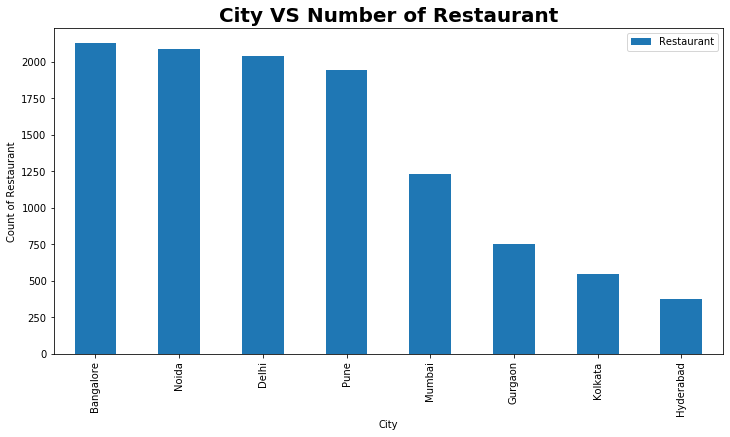

In [30]:
#city wise distribution of resturant records
plt.figure(figsize=(12,6))
ax=train.City.value_counts().plot(kind='bar')
ax.legend(['Restaurant'])
plt.xlabel("City")
plt.ylabel("Count of Restaurant")
plt.title("City VS Number of Restaurant",fontsize=20,weight='bold')

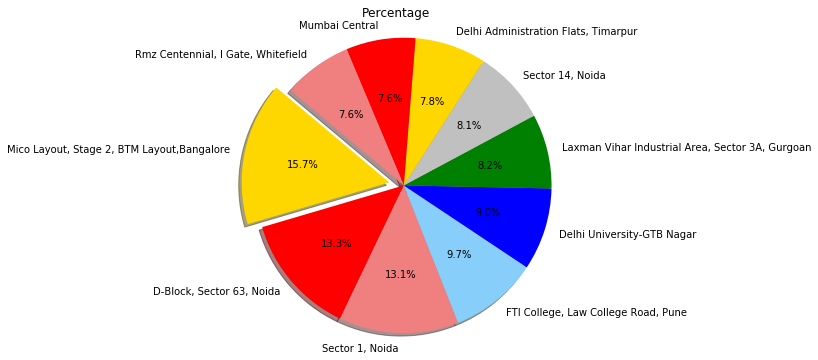

In [31]:
#location wise Distribution of Resturant Records
plt.figure(figsize=(12,6))
names=df_train['Location'].value_counts()[:10].index
values=df_train['Location'].value_counts()[:10].values
colors=['gold','red','lightcoral','lightskyblue','blue','green','silver']
explode=(0.1,0,0,0,0,0,0,0,0,0)

plt.pie(values,explode=explode,labels=names,colors=colors,autopct='%1.1f%%',shadow=True,startangle=140)
plt.axis('equal')
plt.title("Percentage")
plt.show()

Text(0.5, 0, 'Delivery_Time')

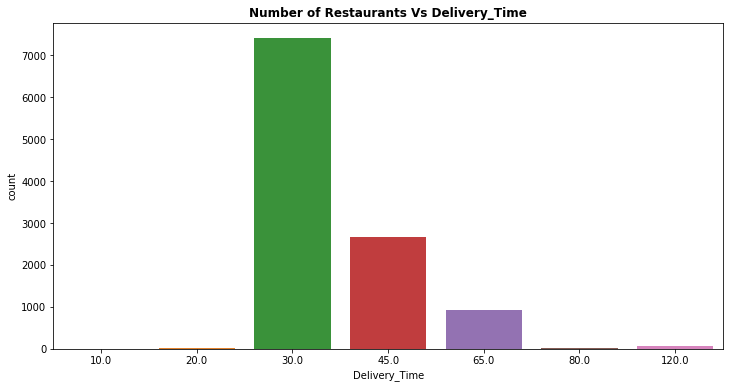

In [32]:
import seaborn as sns
plt.figure(figsize=(12,6))
ax1=sns.countplot(train['Delivery_Time'])
plt.title('Number of Restaurants Vs Delivery_Time',weight='bold')
plt.xlabel('Delivery_Time')

Text(0.5, 1.0, 'Rating vs Delivery Time distribution')

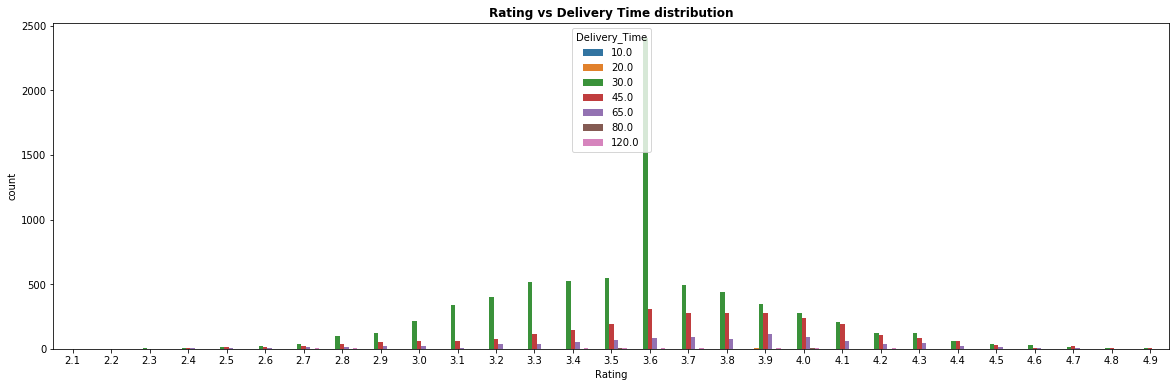

In [33]:
plt.figure(figsize=(20,6))
ax2=sns.countplot(x="Rating",hue="Delivery_Time",data=train)
plt.title('Rating vs Delivery Time distribution',weight='bold')

Text(0.5, 1.0, 'City vs Delivery Time distribution')

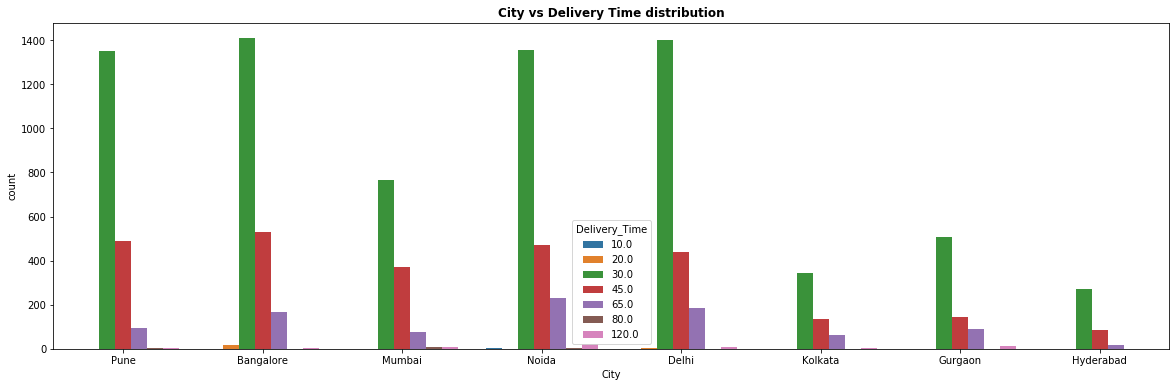

In [34]:
plt.figure(figsize=(20,6))
ax2=sns.countplot(x="City",hue="Delivery_Time",data=train)
plt.title('City vs Delivery Time distribution',weight='bold')

# KNN

In [35]:
#fitting K-NN to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=1)
classifier.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [36]:
#Applying grid search for find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters=[{'n_neighbors' : [1,2,3,4,5,6]}]

grid_search= GridSearchCV(estimator= classifier,
                         param_grid=parameters,
                         scoring='accuracy',
                         cv=10,
                         n_jobs= -1)

In [37]:
grid_search=grid_search.fit(x, y)
best_accuracy=grid_search.best_score_
best_parameters=grid_search.best_params_

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [38]:
best_accuracy

0.7503175492895962

In [39]:
best_parameters

{'n_neighbors': 1}

# XGBoost

In [ ]:
# Splitting the dataset into the Training set and Test set
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
for i in range(1,50):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = i)
    xgb = XGBClassifier(learning_rate=0.06)
    xgb.fit(X_train,y_train)
    train_score=xgb.score(X_train,y_train)
    test_score=xgb.score(X_test,y_test)
    if test_score > train_score:
        print("Test Score{} Train Score {} Random {}".format(test_score,train_score,i))
    

Test Score0.7359170797656602 Train Score 0.7321690140845071 Random 9
Test Score0.7381703470031545 Train Score 0.7335211267605634 Random 12
Test Score0.7386210004506535 Train Score 0.7316056338028168 Random 14


# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x, y, test_size = 0.2, random_state = 37)
RFC=RandomForestClassifier(random_state=37,n_estimators=50)
RFC.fit(X_train,y_train)

#X_final=test[['City','Average_Cost','Minimum_Order','Rating','Votes','Reviews','Count Cuisine']]
#X_final=pd.get_dummies(data=X_final,drop_first=True)
pred=RFC.predict(A)
pred

In [ ]:
sub=pd.DataFrame()
sub["Restaurant"]=test["Restaurant"]
sub["Delivery_Time"]=np.round(pred).astype(int)
sub["Delivery_Time"]=sub["Delivery_Time"].astype(str)+"minutes"
sub.to_excel("submission.xlsx",index=False)
sub